In [1]:
from scipy.spatial import Voronoi, voronoi_plot_2d,ConvexHull
import numpy as np
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline  
import math

In [4]:
fichier = open("BS_Locations/Lille_antenna_location.csv",'r')
fichier2 = open("BS_Locations/Lille_antenna_location2.csv",'w')        # On rajoute un tilde à la fin pour éviter d'écraser le fichier source en cas de bug
lignes = fichier.readlines()                # On parcours les lignes du fichier source
for ligne in lignes:
    ligneFinale = ligne.replace(';',', ')            # On remplace tout les espaces par groupe de 4 en tabulation
    fichier2.write(ligneFinale)             # On écrit la nouvelle ligne dans le nouveau fichier
                 
fichier.close()                     # Fermeture du fichier source
fichier2.close()
            
loc_lille=pd.read_csv("BS_Locations/Lille_antenna_location2.csv")
ids=set(loc_lille['LocInfo'])
print(len(ids))
del(loc_lille['LocInfo'])
print(loc_lille)
loc=np.array(loc_lille)

1394
       Coord_X   Coord_y
0       651625   2626995
1       652120   2627118
2       653420   2625730
3       648111   2624325
4       650285   2625320
...        ...       ...
1389    648250   2627725
1390    652584   2626121
1391    653189   2625159
1392    651000   2624075
1393    651280   2627695

[1394 rows x 2 columns]


In [98]:
coor=[(loc[i][0],loc[i][1]) for i in range (len(loc))]
coor2=set(coor)
print(len(coor2))

88


89


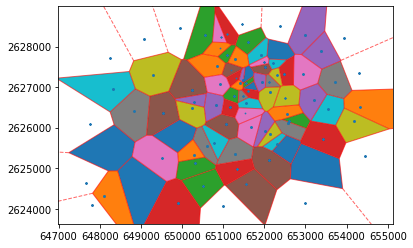

In [97]:
# compute Voronoi tesselation
vor = Voronoi(loc)

# plot
fig = voronoi_plot_2d(vor, show_vertices=False, line_colors='red',line_width=1, line_alpha=0.6, point_size=1.5)

# colorize
p=[]
print(len(vor.regions))
for region in vor.regions:
    if not -1 in region:
        polygon = [vor.vertices[i] for i in region]
        plt.fill(*zip(*polygon))
        p.append(polygon)



plt.show()

In [10]:
def voronoi_area(points):
    v = Voronoi(points)
    vol = np.zeros(v.npoints)
    for i, reg_num in enumerate(v.point_region):
        indices = v.regions[reg_num]
        if -1 in indices: # some regions can be opened
            vol[i] = np.inf
        else:
            vol[i] = ConvexHull(v.vertices[indices]).area
    return vol

In [13]:
areas=voronoi_area(loc)

In [16]:
for i in range(len(areas)):
    print(areas[i])

945.5089340208876
1179.1087650398197
3147.5526986322075
4683.185220730058
1895.39914642407
2029.3619323613534
1648.3444908298352
2432.353407648865
inf
2769.012661065176
1428.67461841826
877.5939210025593
1316.4968246797348
2046.1294620350727
2292.807865763686
1268.5625953128035
6966.196529434754
4683.185220730058
4793.504545687831
inf
1331.7516270595913
2595.4953929508615
1270.3357778010454
1316.4968246797348
1997.5851852263693
inf
inf
3493.182051114673
1166.4334983438298
1912.1724162633682
4625.1765787993645
4440.542296601411
2345.000100612749
2029.3619323613534
2029.3619323613534
2085.667627847087
inf
inf
2999.4617164275705
1869.1616998297964
2979.212670368669
1270.3357778010454
1505.9199453042006
870.1069063424593
1239.562270431667
inf
2760.0489458927805
1505.9199453042006
2113.473669510232
1316.4968246797348
1648.3444908298352
3147.5526986322075
4683.185220730058
4793.504545687831
2979.212670368669
2292.807865763686
1863.227835588824
2085.667627847087
1912.1724162633682
1912.172416

inf
inf
1505.9199453042006
34918.26195992514
2769.012661065176
2345.000100612749
4115.996639257572
2979.212670368669
1863.227835588824
2251.0594498967225
1834.05517802559
1869.1616998297964
1834.05517802559
1166.4334983438298
2432.353407648865
3683.400288896193
1140.5709388191494
1140.5709388191494
1854.007646370681
inf
4683.185220730058
1428.67461841826
1648.3444908298352
inf
2760.0489458927805
34918.26195992514
2113.473669510232
31206.0142043231
2769.012661065176
4440.542296601411
1863.227835588824
2251.0594498967225
6966.196529434754
inf
1270.3357778010454
1201.7143329445366
1997.5851852263693
inf
1270.3357778010454
2231.407028567153
2231.407028567153
3125.8822051463244
1777.71975982767
2979.212670368669
1331.7516270595913
1331.7516270595913
2432.353407648865
inf
3493.182051114673
1648.3444908298352
inf
34918.26195992514
1834.05517802559
inf
2760.0489458927805
inf
1201.7143329445366
inf
3493.182051114673
3118.469814640055
899.0262850367353
1854.007646370681
3125.8822051463244
2562.4

In [9]:
def dist_euclidienne_vect(X,Y):
    somCarre=0
    for i in range(len(X)):
        somCarre+=(X[i]-Y[i])**2
    return math.sqrt(somCarre)

In [10]:
rrh=0
nbRRH_Dist=[]
distances=[]

for distance in range(0,5000,50):
    d=0
    for i in range(len(loc)):
        if(i!=rrh):
            if(dist_euclidienne_vect(loc[i],loc[rrh])<distance):
                d+=1
    nbRRH_Dist.append(d)
    distances.append(distance)


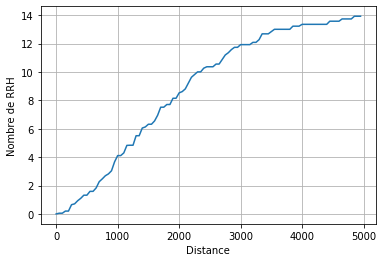

In [19]:
plt.plot(distances,nbRRH_Dist)
plt.xlabel('Distance')
plt.ylabel('Nombre de RRH')
plt.grid(True)
plt.show()

[ 0.    0.05  0.05  0.2   0.2   0.65  0.71  0.93  1.1   1.32  1.32  1.59
  1.59  1.83  2.27  2.47  2.69  2.82  3.04  3.67  4.11  4.11  4.3   4.83
  4.84  4.84  5.51  5.51  6.05  6.13  6.32  6.32  6.55  6.95  7.52  7.52
  7.71  7.71  8.15  8.15  8.53  8.62  8.81  9.22  9.63  9.82 10.01 10.01
 10.27 10.37 10.37 10.37 10.56 10.56 10.88 11.2  11.36 11.58 11.74 11.74
 11.93 11.93 11.93 11.93 12.09 12.09 12.28 12.69 12.69 12.69 12.85 13.01
 13.01 13.01 13.01 13.01 13.01 13.23 13.23 13.23 13.36 13.36 13.36 13.36
 13.36 13.36 13.36 13.36 13.36 13.58 13.58 13.58 13.58 13.74 13.74 13.74
 13.74 13.93 13.93 13.93]


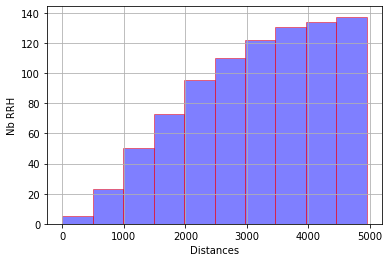

In [13]:
distances2=distances.copy()
distances2.append(5000)
nbRRH_Dist=np.array(nbRRH_Dist)/10
print(nbRRH_Dist)
n, bins, patches = plt.hist(distances,weights=nbRRH_Dist, facecolor='b', alpha=0.5,edgecolor="red")

plt.xlabel('Distances')
plt.ylabel('Nb RRH')
plt.grid(True)
plt.show()

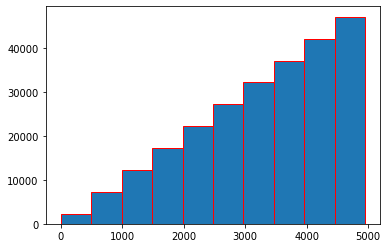

In [14]:
import numpy as np
import matplotlib.pyplot as plt
data = [1,11,21,31,41]
plt.hist(distances, weights=distances, edgecolor="red") 
plt.show()

In [75]:
import matplotlib.pyplot as plt
import random

number_of_colors = 100

color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]
print(color)

['#F1FBB5', '#44CA4D', '#16C482', '#E77C34', '#470456', '#0567BA', '#8F408B', '#843A62', '#9C47C9', '#90B3A8', '#2A2654', '#75DEBD', '#E5FDC5', '#7CA805', '#8128B4', '#050961', '#AF6A56', '#86BD76', '#8C86CE', '#640831', '#05C92A', '#A07DF3', '#0AA98A', '#F05983', '#82ECD4', '#71BF4D', '#720679', '#7C88D3', '#D68A91', '#BA859D', '#4C6D90', '#CE4F2B', '#022181', '#26031F', '#CAADED', '#91CCC5', '#53370C', '#73D252', '#9058CB', '#8A1560', '#EB2E2F', '#E3695D', '#AB0AF1', '#E224F0', '#BC6C10', '#FEFD00', '#3EF8CD', '#EFA4D4', '#16823F', '#CE0EBC', '#F04972', '#0102DC', '#55439A', '#195979', '#1602AF', '#92952C', '#141215', '#B61D27', '#03B7BC', '#48BA79', '#B5C3EB', '#EEB801', '#59700A', '#4124FD', '#7E58A1', '#740145', '#596742', '#C38280', '#EE1F2D', '#22020F', '#55C125', '#B5CD7E', '#E081CF', '#1EC799', '#2639BF', '#7C82FB', '#C07D95', '#DD956F', '#41B75C', '#B2CA28', '#70A208', '#5C883F', '#9432B7', '#9CCF56', '#E5DE42', '#C0B9A3', '#5A821B', '#0F80D8', '#438F17', '#84AC3E', '#2D743D'

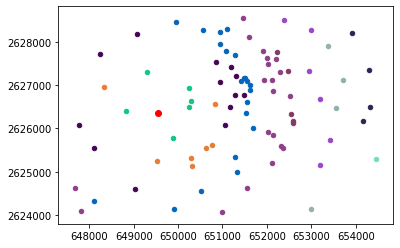

In [77]:
phi = np.linspace(0, 2*np.pi, 60)
rgb_cycle = np.vstack((            # Three sinusoids
    .5*(1.+np.cos(phi          )), # scaled to [0,1]
    .5*(1.+np.cos(phi+2*np.pi/3)), # 120° phase shifted.
    .5*(1.+np.cos(phi-2*np.pi/3)))).T # Shape = (60,3)
rrh=110
nbRRH_Dist=[]
distances=[]
xx=[]
yy=[]
points=[]
j=0
plt.scatter([loc[110][0]],[loc[110][1]],c='red',s=10)
for distance in range(0,6000,500):
    x=[]
    y=[]
    for i in range(len(loc)):
            if(dist_euclidienne_vect(loc[i],loc[rrh])<=distance):
                if ((loc[i][0],loc[i][1]) not in points):
                    points.append((loc[i][0],loc[i][1]))
                    x.append(loc[i][0])
                    y.append(loc[i][1])           
    plt.scatter(x,y,s=20,c=color[j])
    j+=1
   
    nbRRH_Dist.append(d)
    distances.append(distance)
plt.scatter([loc[110][0]],[loc[110][1]],c='red')



In [27]:
r1=set([1,2,3])
r2=set([1,2])
list(r1.difference(r2))

[3]

['#2FC157', '#F349F5', '#2B85DB', '#A7833B', '#9C2B4D', '#CFBABC', '#FA8849', '#D337B0']


In [99]:
[loc[110][0]],[loc[110][1]]

([649540], [2626350])